In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, max_error, accuracy_score, completeness_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None) ## Code to dsiplay all columns in data frame 
pd.set_option('display.max_rows', 5) ## Code to determine number of rows displayed in data frame

df = pd.read_csv('marathon_results_2017.csv')
m1 = df.drop(columns=['Unnamed: 0', 'Unnamed: 9', 'Citizen', 'Proj Time']) ## Remove unnecessary columns
m2 = m1.rename(columns={'Official Time': 'Time'})
m2

,Bib,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Time,Overall,Gender,Division
0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,0:15:25,0:30:28,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,2:09:37,1,1,1
1,17,"Rupp, Galen",30,M,Portland,OR,USA,0:15:24,0:30:27,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,2:09:58,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26408,25268,"Reilly, Bill",64,M,New York,NY,USA,0:40:34,1:27:19,2:17:17,3:11:40,3:22:30,4:06:10,5:07:09,6:06:07,6:56:08,0:16:49,7:20:44,26410,14437,1043
26409,25266,"Rigsby, Scott",48,M,Alpharetta,GA,USA,0:39:36,1:17:12,2:00:10,2:58:55,3:08:16,4:27:14,5:37:13,6:39:07,7:41:23,0:18:15,7:58:14,26411,14438,2553


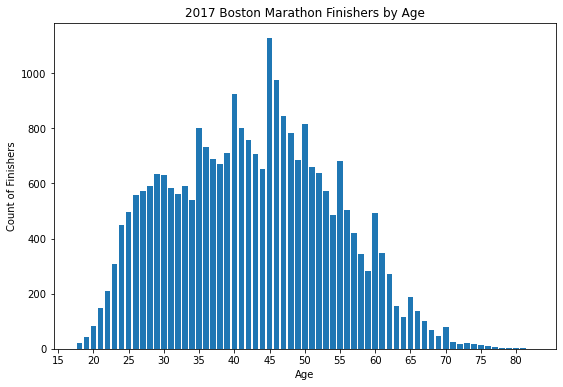

pandas.core.frame.DataFrame

In [4]:
## Exploratory data analysis 1

## Bar graph shows that the majority of runners are in their late 30s and 40s (peak around 46). 
## Issue with x-axis (there shouldn't be any values below 18 because youngest runner is 18).
## Solved by adding 18 to start the x-axis at the correct value.

ages = m2['Age'].value_counts().reset_index()[0:65]
ages.columns = ['Age', 'Count']
sorted_ages = ages.sort_values(by=['Age'])

ind = np.arange(len(ages))

plt.figure(figsize=(9, 6))

plt.bar(ind+18, sorted_ages.Count)

plt.xticks(np.arange(15, 85, step=5))
plt.xlabel("Age")

plt.ylabel("Count of Finishers")

plt.title('2017 Boston Marathon Finishers by Age')

plt.show()

type(ages)

In [5]:
m2 = m2[m2['5K'] != '-']
m2['5K']=pd.to_datetime(m2['5K'])
m2['5K Min'] = m2['5K'].apply(lambda x: (x.hour*60)+x.minute+(x.second/60))

In [6]:
m2 = m2[m2['10K'] != '-']
m2['10K']=pd.to_datetime(m2['10K'])
m2['10K Min'] = m2['10K'].apply(lambda x: (x.hour*60)+x.minute+(x.second/60))

In [7]:
m2 = m2[m2['15K'] != '-']
m2['15K']=pd.to_datetime(m2['15K'])
m2['15K Min'] = m2['15K'].apply(lambda x: (x.hour*60)+x.minute+(x.second/60))

In [8]:
m2 = m2[m2['20K'] != '-']
m2['20K']=pd.to_datetime(m2['20K'])
m2['20K Min'] = m2['20K'].apply(lambda x: (x.hour*60)+x.minute+(x.second/60))

In [9]:
m2 = m2[m2['Half'] != '-']
m2['Half']=pd.to_datetime(m2['Half'])
m2['Half Min'] = m2['Half'].apply(lambda x: (x.hour*60)+x.minute+(x.second/60))

In [10]:
m2 = m2[m2['25K'] != '-']
m2['25K']=pd.to_datetime(m2['25K'])
m2['25K Min'] = m2['25K'].apply(lambda x: (x.hour*60)+x.minute+(x.second/60))

In [11]:
m2 = m2[m2['30K'] != '-']
m2['30K']=pd.to_datetime(m2['30K'])
m2['30K Min'] = m2['30K'].apply(lambda x: (x.hour*60)+x.minute+(x.second/60))

In [12]:
m2 = m2[m2['35K'] != '-']
m2['35K']=pd.to_datetime(m2['35K'])
m2['35K Min'] = m2['35K'].apply(lambda x: (x.hour*60)+x.minute+(x.second/60))

In [13]:
m2 = m2[m2['40K'] != '-']
m2['40K']=pd.to_datetime(m2['40K'])
m2['40K Min'] = m2['40K'].apply(lambda x: (x.hour*60)+x.minute+(x.second/60))

In [14]:
m2 = m2[m2['Pace'] != '-']
m2['Pace']=pd.to_datetime(m2['Pace'])
m2['Pace Min'] = m2['Pace'].apply(lambda x: (x.hour*60)+x.minute+(x.second/60))

In [15]:
m2 = m2[m2['Time'] != '-']
m2['Time']=pd.to_datetime(m2['Time'])
m2['Time Min'] = m2['Time'].apply(lambda x: (x.hour*60)+x.minute+(x.second/60))

In [16]:
m3 = m2.drop(columns=['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Time'])
m3

,Bib,Name,Age,M/F,City,State,Country,Overall,Gender,Division,5K Min,10K Min,15K Min,20K Min,Half Min,25K Min,30K Min,35K Min,40K Min,Pace Min,Time Min
0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,1,1,1,15.416667,30.466667,45.733333,61.250000,64.583333,76.983333,93.016667,108.316667,122.883333,4.950000,129.616667
1,17,"Rupp, Galen",30,M,Portland,OR,USA,2,2,2,15.400000,30.450000,45.733333,61.250000,64.583333,76.983333,93.016667,108.316667,123.233333,4.966667,129.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26408,25268,"Reilly, Bill",64,M,New York,NY,USA,26410,14437,1043,40.566667,87.316667,137.283333,191.666667,202.500000,246.166667,307.150000,366.116667,416.133333,16.816667,440.733333
26409,25266,"Rigsby, Scott",48,M,Alpharetta,GA,USA,26411,14438,2553,39.600000,77.200000,120.166667,178.916667,188.266667,267.233333,337.216667,399.116667,461.383333,18.250000,478.233333


Text(0.5, 1.0, '5K and Boston Marathon Finishing Times by Gender (min)')

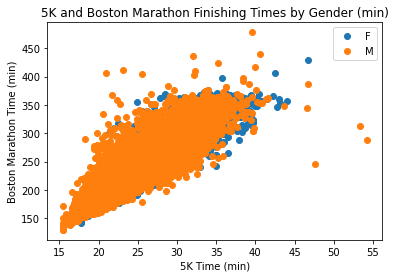

In [17]:
## Exploratory Data Analysis 2

groups = m3.groupby("M/F")
for name, group in groups:
    plt.plot(group["5K Min"], group["Time Min"], marker="o", linestyle="", label=name)
plt.legend()
plt.xlabel("5K Time (min)")
plt.ylabel("Boston Marathon Time (min)")
plt.title('5K and Boston Marathon Finishing Times by Gender (min)')

<Figure size 648x432 with 0 Axes>

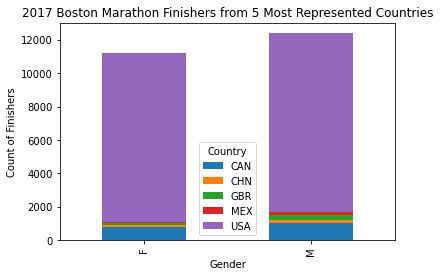

In [18]:
## Exploratory Data Analysis 3

grouped = m3.groupby(['Country'])
grouped.size().sort_values(ascending = False).head()
countryarray = ['USA', 'CAN', 'GBR', 'MEX', 'CHN']

fivecountries = m3[m3['Country'].isin(countryarray)]

plt.figure(figsize=(9, 6))

fivecountries.groupby(['M/F','Country']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel("Gender")
plt.ylabel("Count of Finishers")
plt.title('2017 Boston Marathon Finishers from 5 Most Represented Countries')

plt.show()

In [19]:
## Creating new variables
## Variable 1: Half x 2 variable for predicted marathon time
## Variable 2: Pace x 26.2 for predicted marathon time

m3['Predicted Time from Half']=m3['Half Min'].apply(lambda x: x*2)
m3['Predicted Time from Pace']=m3['Pace Min'].apply(lambda x: x*26.2)
m3

,Bib,Name,Age,M/F,City,State,Country,Overall,Gender,Division,5K Min,10K Min,15K Min,20K Min,Half Min,25K Min,30K Min,35K Min,40K Min,Pace Min,Time Min,Predicted Time from Half,Predicted Time from Pace
0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,1,1,1,15.416667,30.466667,45.733333,61.250000,64.583333,76.983333,93.016667,108.316667,122.883333,4.950000,129.616667,129.166667,129.690000
1,17,"Rupp, Galen",30,M,Portland,OR,USA,2,2,2,15.400000,30.450000,45.733333,61.250000,64.583333,76.983333,93.016667,108.316667,123.233333,4.966667,129.966667,129.166667,130.126667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26408,25268,"Reilly, Bill",64,M,New York,NY,USA,26410,14437,1043,40.566667,87.316667,137.283333,191.666667,202.500000,246.166667,307.150000,366.116667,416.133333,16.816667,440.733333,405.000000,440.596667
26409,25266,"Rigsby, Scott",48,M,Alpharetta,GA,USA,26411,14438,2553,39.600000,77.200000,120.166667,178.916667,188.266667,267.233333,337.216667,399.116667,461.383333,18.250000,478.233333,376.533333,478.150000


In [20]:
## Data frame to split into train and test data sets.
x = m3[['5K Min', 'Half Min', 'Division', 'Pace Min', 'Time Min']]
y = m3['M/F']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

In [64]:
le = preprocessing.LabelEncoder()
encodedtrain = le.fit_transform(y_train)
le.transform(['M', 'M', 'F'])
encodedtrain

array([0, 0, 0, ..., 0, 1, 1])

In [65]:
le = preprocessing.LabelEncoder()
encodedtest = le.fit_transform(y_test)
le.transform(['M', 'M', 'F'])
encodedtest

array([0, 0, 1, ..., 0, 0, 1])

In [66]:
lr = LogisticRegression(solver='liblinear', C=15, penalty='l1', multi_class='auto', max_iter=100)

In [67]:
lr.fit(x_train, encodedtrain)

LogisticRegression(C=15, penalty='l1', solver='liblinear')

In [70]:
preds = lr.predict(x_test)
(preds == encodedtest).sum() / len(encodedtest)
f1_score(encodedtest, preds)

0.7211955648401093

In [36]:
penalty = ['none', 'l2']
C = [.001, .01, 1, 5, 10]
solver = ['sag', 'saga', 'liblinear']
multi_class = ['auto', 'ovr', 'multinomial']

hyperparameters = dict(C=C, penalty=penalty, solver=solver, multi_class=multi_class) 
print(hyperparameters)

{'C': [0.001, 0.01, 1, 5, 10], 'penalty': ['none', 'l2'], 'solver': ['sag', 'saga', 'liblinear'], 'multi_class': ['auto', 'ovr', 'multinomial']}


In [37]:
gridsearch = GridSearchCV(lr, hyperparameters, cv=5, verbose=1, error_score=np.nan)
best_model = gridsearch.fit(x_train, encodedtrain)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   50.9s finished


In [38]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty']) 
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best multi_class:', best_model.best_estimator_.get_params()['multi_class'])
print("The mean accuracy of the model is:",best_model.score(x_train, encoded))
print(best_model.best_estimator_)

Best Penalty: l2
Best C: 1
Best solver: liblinear
Best multi_class: auto
The mean accuracy of the model is: 0.6688722806683487
LogisticRegression(C=1, solver='liblinear')


In [51]:
neigh = KNeighborsClassifier(n_neighbors=15, p=1, n_jobs=1)
neigh.fit(x_train, encodedtrain)
predictions = neigh.predict(x_test)
f1_score(encodedtest, predictions)

0.9242289178106614

In [46]:
clf = RandomForestClassifier(max_depth=20, random_state=8, min_samples_split=15, max_features='log2', verbose=1)
clf.fit(x_train, encodedtrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=15,
                       random_state=8, verbose=1)

In [47]:
preds3 = clf.predict(x_test)
preds3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


array([0, 1, 1, ..., 0, 0, 1])

In [48]:
f1_score(encodedtest, preds3)

0.9183088498745968

In [49]:
max_depth = ['10', '12', '15', '18', '20']
min_samples_split = ['7', '8', '9', '12']
max_features = ['auto', 'sqrt', 'log2']

hyperparametersF = dict(max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features) 
print(hyperparametersF)

{'max_depth': ['10', '12', '15', '18', '20'], 'min_samples_split': ['7', '8', '9', '12'], 'max_features': ['auto', 'sqrt', 'log2']}
